<a href="https://colab.research.google.com/github/yoshi2210/PokemonDataLab/blob/main/Pokemon_Pulp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データの読み込み

In [1]:
import requests
from IPython.display import Image, display
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_A = pd.read_csv('/content/drive/MyDrive/PokeDS/df_A.csv',encoding='utf-8')
df_A

,id,name,height,weight,is_legendary,is_mythical,is_baby,capture_rate,hp,attack,defense,special-attack,special-defense,speed,generation,png
0,1,bulbasaur,7,69,False,False,False,45,45,49,49,65,65,45,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...
1,2,ivysaur,10,130,False,False,False,45,60,62,63,80,80,60,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...
2,3,venusaur,20,1000,False,False,False,45,80,82,83,100,100,80,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...
3,4,charmander,6,85,False,False,False,45,39,52,43,60,50,65,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...
4,5,charmeleon,11,190,False,False,False,45,58,64,58,80,65,80,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1004,chi-yu,4,49,False,False,False,6,55,80,80,135,120,100,generation-ix,https://raw.githubusercontent.com/PokeAPI/spri...
1004,1005,roaring-moon,20,3800,False,False,False,10,105,139,71,55,101,119,generation-ix,https://raw.githubusercontent.com/PokeAPI/spri...
1005,1006,iron-valiant,14,350,False,False,False,10,74,130,90,120,60,116,generation-ix,https://raw.githubusercontent.com/PokeAPI/spri...
1006,1007,koraidon,25,3030,False,False,False,3,100,135,115,85,100,135,generation-ix,https://raw.githubusercontent.com/PokeAPI/spri...


In [4]:
df_D = pd.read_csv('/content/drive/MyDrive/PokeDS/df_D.csv',encoding='utf-8')
df_D

,id,type,primary_type
0,1,grass,Primary
1,1,poison,Secondary
2,2,grass,Primary
3,2,poison,Secondary
4,3,grass,Primary
...,...,...,...
1514,1006,fighting,Secondary
1515,1007,fighting,Primary
1516,1007,dragon,Secondary
1517,1008,electric,Primary


In [5]:
df_H = pd.read_csv('/content/drive/MyDrive/PokeDS/df_H.csv',encoding='utf-8')
df_H

,type_id,en,ja_Hrkt_name,damage_relation,object_type
0,1,Normal,ノーマル,double_damage_from,fighting
1,1,Normal,ノーマル,half_damage_to,rock
2,1,Normal,ノーマル,half_damage_to,steel
3,1,Normal,ノーマル,no_damage_from,ghost
4,1,Normal,ノーマル,no_damage_to,ghost
...,...,...,...,...,...
235,18,Fairy,フェアリー,half_damage_from,dark
236,18,Fairy,フェアリー,half_damage_to,poison
237,18,Fairy,フェアリー,half_damage_to,steel
238,18,Fairy,フェアリー,half_damage_to,fire


# データの成形

df: PKがポケモンidになるように、タイプや種族値合計情報を一つのテーブル  
typeChart: タイプの相互関係を攻撃にかかる係数で表現したテーブル

In [6]:
df_D_pivot = df_D.pivot(index='id', columns='primary_type', values='type')
print(df_D_pivot.columns)
df_D_pivot

Index(['Primary', 'Secondary'], dtype='object', name='primary_type')


primary_type,Primary,Secondary
id,,
1,grass,poison
2,grass,poison
3,grass,poison
4,fire,NaN
5,fire,NaN
...,...,...
1004,dark,fire
1005,dragon,dark
1006,fairy,fighting


In [7]:
df_D_pivot.Primary[1]

'grass'

In [8]:
df = pd.merge(df_A, df_D_pivot, how = 'left', on='id')
df['Total'] = df.hp + df.attack + df.defense + df['special-attack'] + df['special-defense'] + df.speed
df.head(10)

,id,name,height,weight,is_legendary,is_mythical,is_baby,capture_rate,hp,attack,defense,special-attack,special-defense,speed,generation,png,Primary,Secondary,Total
0,1,bulbasaur,7,69,False,False,False,45,45,49,49,65,65,45,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...,grass,poison,318
1,2,ivysaur,10,130,False,False,False,45,60,62,63,80,80,60,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...,grass,poison,405
2,3,venusaur,20,1000,False,False,False,45,80,82,83,100,100,80,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...,grass,poison,525
3,4,charmander,6,85,False,False,False,45,39,52,43,60,50,65,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...,fire,NaN,309
4,5,charmeleon,11,190,False,False,False,45,58,64,58,80,65,80,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...,fire,NaN,405
5,6,charizard,17,905,False,False,False,45,78,84,78,109,85,100,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...,fire,flying,534
6,7,squirtle,5,90,False,False,False,45,44,48,65,50,64,43,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...,water,NaN,314
7,8,wartortle,10,225,False,False,False,45,59,63,80,65,80,58,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...,water,NaN,405
8,9,blastoise,16,855,False,False,False,45,79,83,100,85,105,78,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...,water,NaN,530
9,10,caterpie,3,29,False,False,False,255,45,30,35,20,20,45,generation-i,https://raw.githubusercontent.com/PokeAPI/spri...,bug,NaN,195


In [9]:
df[df.name.str.contains('mega')]

,id,name,height,weight,is_legendary,is_mythical,is_baby,capture_rate,hp,attack,defense,special-attack,special-defense,speed,generation,png,Primary,Secondary,Total
153,154,meganium,18,1005,False,False,False,45,80,82,100,83,100,80,generation-ii,https://raw.githubusercontent.com/PokeAPI/spri...,grass,NaN,525
468,469,yanmega,19,515,False,False,False,30,86,76,86,116,56,95,generation-iv,https://raw.githubusercontent.com/PokeAPI/spri...,bug,flying,515


In [10]:
def set_damage(row):
    if (row.damage_relation == 'double_damage_to'):
        return 2
    # elif (row.damage_relation == 'double_damage_from'):
    #     return 2
    elif (row.damage_relation == 'half_damage_to'):
        return 0.5
    # elif (row.damage_relation == 'double_damage_to'):
    #     return 2

    elif (row.damage_relation == 'no_damage_to'):
        return 0
    # elif (row.damage_relation == 'no_damage_from'):
    #     return 0
    else:
        return 1

df_H_oneside = df_H.copy()
df_H_oneside = df_H_oneside[df_H_oneside['damage_relation'].str.contains('to')]

df_H_oneside['damage_val'] =  df_H_oneside.apply(set_damage, axis = 1)

df_H_oneside

,type_id,en,ja_Hrkt_name,damage_relation,object_type,damage_val
1,1,Normal,ノーマル,half_damage_to,rock,0.5
2,1,Normal,ノーマル,half_damage_to,steel,0.5
4,1,Normal,ノーマル,no_damage_to,ghost,0.0
8,2,Fighting,かくとう,double_damage_to,normal,2.0
9,2,Fighting,かくとう,double_damage_to,rock,2.0
...,...,...,...,...,...,...
231,18,Fairy,フェアリー,double_damage_to,dragon,2.0
232,18,Fairy,フェアリー,double_damage_to,dark,2.0
236,18,Fairy,フェアリー,half_damage_to,poison,0.5
237,18,Fairy,フェアリー,half_damage_to,steel,0.5


In [11]:
df_H_oneside_pivot = df_H_oneside.pivot_table(index='en', columns='object_type', values='damage_val')
df_H_oneside_pivot.replace(np.nan,1,inplace=True)
typeChart = df_H_oneside_pivot
typeChart

object_type,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
en,,,,,,,,,,,,,,,,,,
Bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0
Dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,1.0
Fighting,0.5,2.0,1.0,1.0,0.5,1.0,1.0,0.5,0.0,1.0,1.0,2.0,2.0,0.5,0.5,2.0,2.0,1.0
Fire,2.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.5,2.0,0.5
Flying,2.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0
Ghost,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0


In [12]:
typeChart.columns

Index(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
       'psychic', 'rock', 'steel', 'water'],
      dtype='object', name='object_type')

# 数理最適化でパーティーを構築してみる
思い入れのあるポケモンを1匹いれつつ、ダイパの四天王が出してくるポケモンタイプに最低1匹は有効なポケモンを有する種族値最大パーティーを構築するために、数理最適化問題としてPulpで解くことができる。  

目的変数：採用するポケモンの種族値合計を最大化する採用パーティーを組む
$$ \hat{P}= \underset{a}{\operatorname{argmax}}  TP $$

制約条件：パーティー数は6匹
$$ \sum_{i=0}^{n}P_i = 6  $$

制約条件：最低1匹含める
$$ \sum_{i\in S}^{}P_i = 1  $$

制約条件：どのタイプjについても、優位性を持つポケモンが最低2匹いる
$$ \sum_{i=0}^{n} A_{ij}P_j >= 2 {\space}
{\space}{\space}{\space}{\space}{\space} \forall{j{\space}(\in m)})$$


where  

T:種族値合計値の行列(n,1)
P:パーティー採用行列(n,1), 01で採用を表現  
S:最低1匹使いたいポケモンの集合  
A:タイプに対するポケモンの優位性行列(n,m), 01で優位性を表現  
n:検討するポケモンの数  
i:ポケモン探索のインデックス  
m:勝ちたい相手のタイプリストの長さ
j:相手にするタイプのインデックス  


In [13]:
! pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 47.0 MB/s eta 0:00:00


In [14]:
types = ['Rock', 'Grass', 'Fighting', 'Water', 'Ghost', 'Steel',
         'Ice', 'Electric', 'Bug', 'Ground', 'Fire', 'Psychic']

gymEliteFour = typeChart[[c for c in typeChart.columns if c in list(map(lambda x: x.lower(), types))]]
gymEliteFour.index = list(map(lambda x: x.lower(), gymEliteFour.index))
gymEliteFour

object_type,bug,electric,fighting,fire,ghost,grass,ground,ice,psychic,rock,steel,water
bug,1.0,1.0,0.5,0.5,0.5,2.0,1.0,1.0,2.0,1.0,0.5,1.0
dark,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
dragon,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
electric,1.0,0.5,1.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,2.0
fairy,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
fighting,0.5,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.5,2.0,2.0,1.0
fire,2.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,0.5,2.0,0.5
flying,2.0,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.5,0.5,1.0
ghost,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
grass,0.5,1.0,1.0,0.5,1.0,0.5,2.0,1.0,1.0,2.0,0.5,2.0


## pulpにかける変数を定義する

In [107]:
strengths = []
numbers = []
names = []
totalStats = []
i = 0
num_poke = df.shape[0] # ポケモン数


# データフレームから一行ずつ取り出して、必要なリストを作る
for row in df.itertuples(index=True, name='Pandas'):
    numbers.append(row.id)
    names.append(row.name)

    # 特定のポケモンのPrimaryタイプと、四天王のポケモンタイプとの相性を 01 のリストにする
    strengths.append([1 if s >= 2.0 else 0 for s in list(gymEliteFour.loc[row.Primary])])
    totalStats.append(row.Total)

    # 特定のポケモンのSecondaryタイプと、四天王のポケモンタイプとの相性を 01 のリストにする、Secondaryがない場合はとばす   
    # Primaryタイプのリストに足すので、0,1,2のリストになる
    try:
        strengths[i] = list(np.add(strengths[i], [1 if s >= 2.0 else 0 for s in list(gymEliteFour.loc[row.Secondary])]))
    except:
        KeyError
        
    i += 1
    
# Strength（ポケモン数×タイプ数）の0,1,2マルチリストから、01リストにかえる
advantage = [[1 if r >= 1 else 0 for r in strengths[i]] for i in range(num_poke)]

# パーティー決めにおける1匹含めるべき必須ポケモンのリスト
# starterNames = ['Turtwig', 'Grotle', 'Torterra', 
#                 'Chimchar', 'Monferno', 'Infernape',
#                'Piplup', 'Prinplup', 'Empoleon']
starterNames = ['Typhlosion']
               

starterIndices = []
for pkmn in list(map(lambda x: x.lower(), starterNames)):
    starterIndices.append(names.index(pkmn))

## pulp に求解させる

In [108]:
from pulp import *

# 全体的にpulp関係の変数やら積和なりする記述方法が独特で、とっつきづらい。lpDot,lpSumとか。
# https://www.letsopt.com/entry/2020/08/12/232018

# 問題を定義する。名前をつけて、目的変数を最大化させる(pulp.LpMaximize or pulp.LpMinimize)
best_team = LpProblem("Optimal_Pokemon_Team", LpMaximize)

# 変数を定義する。.dictで辞書型を定義する。変数の名前をつけて、indexesをつくって、カテゴリ（integer, continuous, binary)を決める
P = LpVariable.dicts("P", range(num_poke), cat=LpBinary) # we have #num_poke Pokemon to consider

# 目的変数を += で設定する。
# PuLP で大きなモデル作るなら、numpy や pandas の sum や dot の使用は避けるべきらしい。
# pulp.lpSum と pulp.lpDot を使い、場合によっては LpAffineExpression を自前で定義するとよいらしい。
# https://qiita.com/ytakashina/items/9de38882ffa611d5a07a
best_team += lpSum([totalStats[pkmn] * P[pkmn] for pkmn in range(num_poke)])


# 制約条件を best_team += の後に記述する。今回はポケモンパーティーの構成が6匹なので,01で採用を決めているPの合計値が6になればいい。
best_team += lpSum([P[pkmn] for pkmn in range(num_poke)]) == 6

# 制約条件を best_team += の後に記述する。今回はポケモンパーティーの構成のうち、初期構成のポケモンが1匹含まれていることを制約とする。
best_team += lpSum([P[pkmn] for pkmn in starterIndices]) == 1

# 制約条件を best_team += の後に記述する。対象とするタイプ構成に有効なポケモンを最低2匹そろえる
# Constraint that we should have a Pokemon strong against at least one of the gym leaders/Elite Four

for i in range(gymEliteFour.shape[1]):
    best_team += lpSum([advantage[pkmn][i] * P[pkmn] for pkmn in range(num_poke)]) >= 2


# 求解させる
result = best_team.solve()

In [109]:
print('result: {}'.format(LpStatus[result])) 

result: Optimal


typhlosion


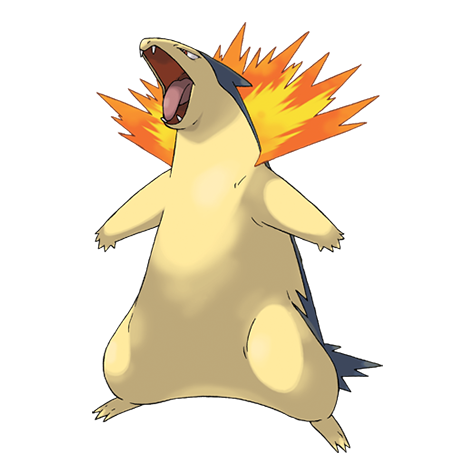

ho-oh


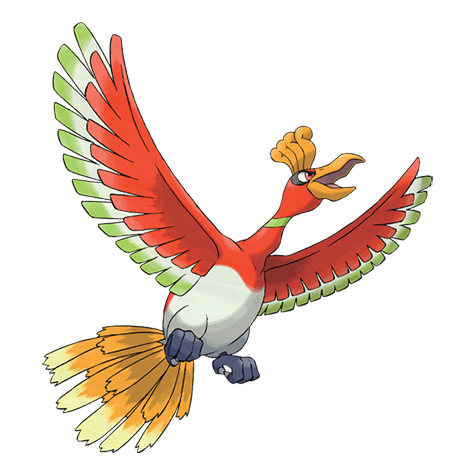

groudon


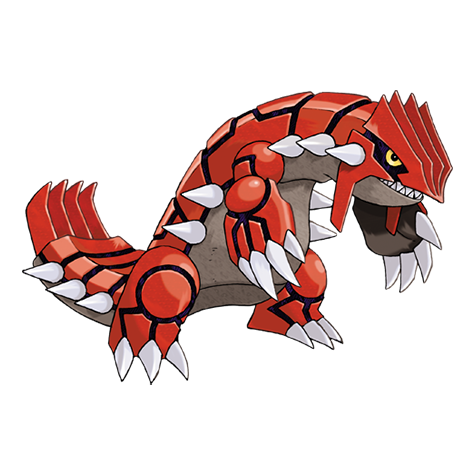

torterra


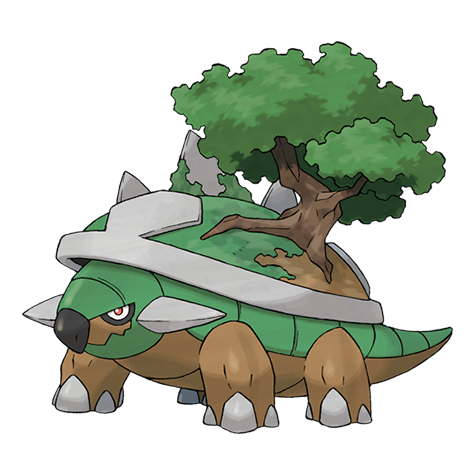

yveltal


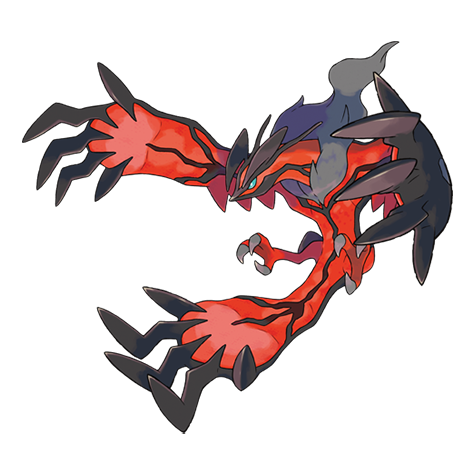

zarude


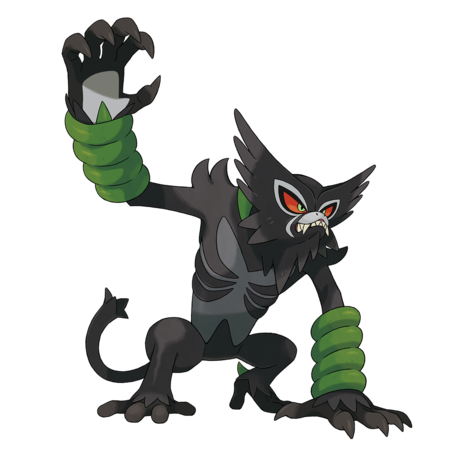

In [110]:
for i in range(num_poke):
    if P[i].value() == 1:
        print(names[i])
        display(Image(df[df['name']==names[i]].png.values[0],width=100))

## さすがに容赦がなさすぎるパーティーになったので、制約条件を追加する

種族値を最大化させようとしたので、どうしても伝説系が多くなり容赦がない。  
そこで伝説系神話系は除外する制約を付与して再チャレンジする。  
それにそもそもバクフーンがすきなので、バクフーンを必ず入れることにする。

In [105]:
removal_pokem_list = df[df.is_legendary==True].name.unique().tolist() # df[df.is_legendary==True].name.str.capitalize().unique().tolist()
removal_pokem_list.extend(df[df.is_mythical==True].name.unique().tolist()) #removal_pokem_list.extend(df[df.is_mythical==True].name.str.capitalize().unique().tolist())
print(len(removal_pokem_list))

81


result: Optimal
dragonite


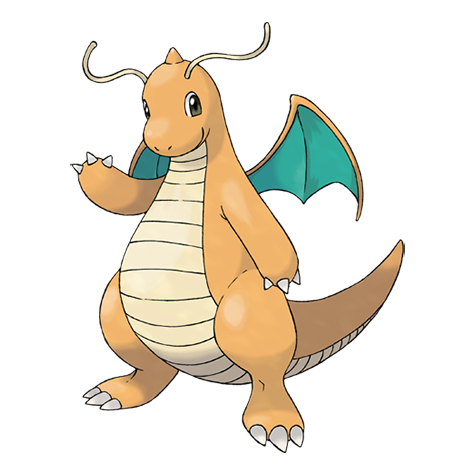

typhlosion


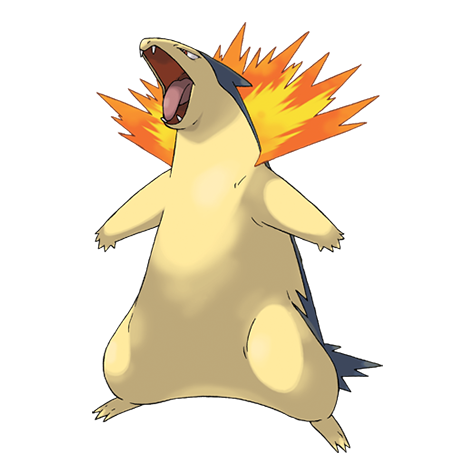

metagross


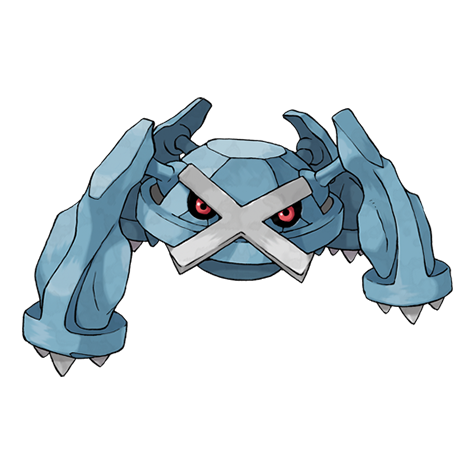

torterra


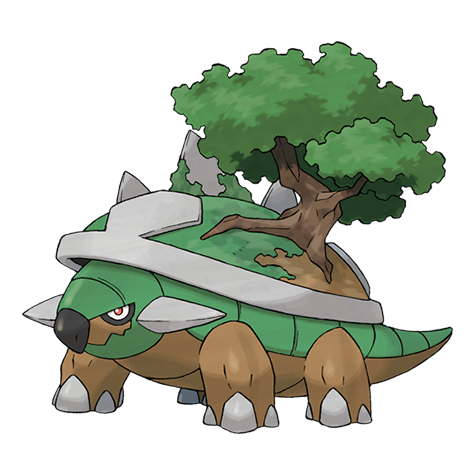

brute-bonnet


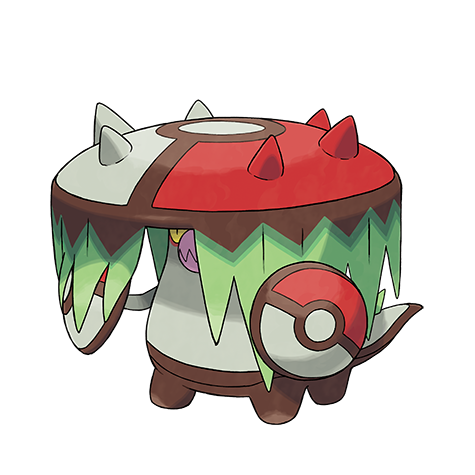

ting-lu


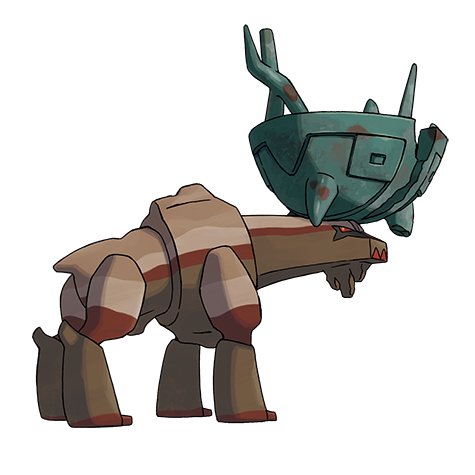

In [106]:
strengths = []
numbers = []
names = []
totalStats = []
i = 0
num_poke = df.shape[0] # ポケモン数


# データフレームから一行ずつ取り出して、必要なリストを作る
for row in df.itertuples(index=True, name='Pandas'):
    numbers.append(row.id)
    names.append(row.name)

    # 特定のポケモンのPrimaryタイプと、四天王のポケモンタイプとの相性を 01 のリストにする
    strengths.append([1 if s >= 2.0 else 0 for s in list(gymEliteFour.loc[row.Primary])])
    totalStats.append(row.Total)

    # 特定のポケモンのSecondaryタイプと、四天王のポケモンタイプとの相性を 01 のリストにする、Secondaryがない場合はとばす   
    # Primaryタイプのリストに足すので、0,1,2のリストになる
    try:
        strengths[i] = list(np.add(strengths[i], [1 if s >= 2.0 else 0 for s in list(gymEliteFour.loc[row.Secondary])]))
    except:
        KeyError
        
    i += 1
    
# Strength（ポケモン数×タイプ数）の0,1,2マルチリストから、01リストにかえる
advantage = [[1 if r >= 1 else 0 for r in strengths[i]] for i in range(num_poke)]

# パーティー決めにおける1匹含めるべき必須ポケモンのリスト
starterNames = ['Typhlosion']

starterIndices = []
for pkmn in list(map(lambda x: x.lower(), starterNames)):
    starterIndices.append(names.index(pkmn))


# 除外するようの制約条件を追加するためのポケモンのリスト
removalIndices = []
for pkmn in removal_pokem_list:
    removalIndices.append(names.index(pkmn))


################################################################################################################################################

from pulp import *

# 全体的にpulp関係の変数やら積和なりする記述方法が独特で、とっつきづらい。lpDot,lpSumとか。
# https://www.letsopt.com/entry/2020/08/12/232018

# 問題を定義する。名前をつけて、目的変数を最大化させる(pulp.LpMaximize or pulp.LpMinimize)
best_team = LpProblem("Optimal_Pokemon_Team", LpMaximize)

# 変数を定義する。.dictで辞書型を定義する。変数の名前をつけて、indexesをつくって、カテゴリ（integer, continuous, binary)を決める
P = LpVariable.dicts("P", range(num_poke), cat=LpBinary) # we have #num_poke Pokemon to consider

# 目的変数を += で設定する。
# PuLP で大きなモデル作るなら、numpy や pandas の sum や dot の使用は避けるべきらしい。
# pulp.lpSum と pulp.lpDot を使い、場合によっては LpAffineExpression を自前で定義するとよいらしい。
# https://qiita.com/ytakashina/items/9de38882ffa611d5a07a
best_team += lpSum([totalStats[pkmn] * P[pkmn] for pkmn in range(num_poke)])


# 制約条件を best_team += の後に記述する。今回はポケモンパーティーの構成が6匹なので,01で採用を決めているPの合計値が6になればいい。
best_team += lpSum([P[pkmn] for pkmn in range(num_poke)]) == 6

# 制約条件を best_team += の後に記述する。今回はポケモンパーティーの構成のうち、初期構成のポケモンが1匹含まれていることを制約とする。
best_team += lpSum([P[pkmn] for pkmn in starterIndices]) == 1

# 制約条件を best_team += の後に記述する。今回はポケモンパーティーの構成のうち、除外ポケモンが1匹も含まれていないことを制約とする。
best_team += lpSum([P[pkmn] for pkmn in removalIndices]) == 0


# 制約条件を best_team += の後に記述する。対象とするタイプ構成に有効なポケモンを最低2匹そろえる
for i in range(gymEliteFour.shape[1]):
    best_team += lpSum([advantage[pkmn][i] * P[pkmn] for pkmn in range(num_poke)]) >= 2


# 求解させる
result = best_team.solve()


print('result: {}'.format(LpStatus[result])) 


for i in range(num_poke):
    if P[i].value() == 1:
        print(names[i])
        display(Image(df[df['name']==names[i]].png.values[0],width=100))

なんとなく打倒な感じがしますね。